# Sentiment Analysis using Logistic Regression leveraging NLTK library

Sentiment analysis is a technique through which you can analyze a piece of text to determine the sentiment behind it. It combines machine learning and natural language processing (NLP) to achieve this. Using basic Sentiment analysis, a program can understand if the sentiment behind a piece of text is positive, negative, or neutral.

To perform this sentiment analysis we need very simple 5 steps -
1. Preprocess the text by removing extra unwanted words, stop words & punctuation
2. Generate frequency metrics has positive or negetive count with respect to each word
3. Extract feature map which has [word, postive count, negetive count] 
4. Divide into train and test and classify using any classifier ( Logistic regression )
5. Predict & Evaluate classifier output

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import twitter_samples
nltk.download('stopwords')

import sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
import seaborn as sns

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer,WordNetLemmatizer         # module for stemming

from nltk.tokenize import TweetTokenizer,sent_tokenize,word_tokenize   # module for tokenizing strings

from sklearn.utils import shuffle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yogesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\yogesh\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [49]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

Preprocess_tweet function cleans the tweet after removing extra stop words, punctuation etc. After this tweet need to be tokenize into words & then words converted into their respective lemma

In [50]:
def preprocess_tweets(tweet):
    tweets_clean = []
    
    # Instantiate stemming class
    Lemma = WordNetLemmatizer()
    
    # Create an empty list to store the stems
    tweets_lemma = []

    stopwords_english = stopwords.words('english') 
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    
    tweet2 = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet2 = re.sub(r'#', '', tweet2)
    

    tweet_tokens = tokenizer.tokenize(tweet2)
    
    for word_token in tweet_tokens:
        if(word_token not in stopwords_english and word_token not in string.punctuation):
            stem_word = Lemma.lemmatize(word_token)
            tweets_clean.append(stem_word)
    
    return tweets_clean

generate positive & negetive count for each word occured in the tweet

In [51]:
def build_freq(tweets,label):
    ys = label
    yslist = np.squeeze(ys).tolist()

    freq = {}

    for tweet,y in zip(tweets,ys):
        for word in preprocess_tweets(tweet):
            pair = (word,y)
            if pair in freq:
                freq[pair] += 1
            else:
                freq[pair] = 1
    return freq

Build frequency metrics [word, postive count, negetive count]

In [52]:
def extract_feature_map(tweet,freq):
    clean_word = preprocess_tweets(tweet)
    x = np.zeros((1,3))
    x[0,0]=1

    for word in clean_word:
        x[0,1] += freq.get((word,1.0),0)
        x[0,2] += freq.get((word,0.0),0)

    return x

In [53]:
# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [54]:
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [55]:
freqs = build_freq(train_x, np.squeeze(train_y))

In [56]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i]=extract_feature_map(train_x[i],freqs)

y = train_y

In [57]:
X, y = shuffle(X, y)

In [58]:
Logistic_reg = LogisticRegression()
Logistic_reg.fit(X,y)

C:\Users\yogesh\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
Logistic_reg.predict(extract_feature_map(test_x[0],freqs))

array([1.])

In [110]:
Pred_y = np.zeros(len(test_x))
y_pred_proba = pd.DataFrame()
for i in range(0,len(test_x)):
    Pred_y[i]= Logistic_reg.predict(extract_feature_map(test_x[i],freqs))
    y_pred_proba=pd.concat([y_pred_proba,pd.DataFrame(Logistic_reg.predict_proba(extract_feature_map(test_x[i],freqs)))])

In [111]:
y_pred_proba

,0,1
0,4.948930e-12,1.000000e+00
0,6.562750e-12,1.000000e+00
0,1.011463e-03,9.989885e-01
0,1.162315e-11,1.000000e+00
0,4.354098e-04,9.995646e-01
...,...,...
0,1.000000e+00,2.445775e-17
0,1.000000e+00,4.359294e-17
0,1.000000e+00,3.417759e-17
0,1.000000e+00,4.727733e-17


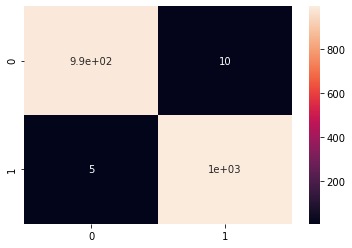

In [82]:
sns.heatmap(confusion_matrix(test_y,Pred_y),annot=True)

In [84]:
from sklearn.metrics import f1_score,precision_score, recall_score,roc_auc_score,r2_score,roc_curve

In [1]:
print("Precision score",precision_score(y_true=test_y,y_pred=Pred_y))

NameError: name 'precision_score' is not defined

In [86]:
print("recall score",recall_score(y_true=test_y,y_pred=Pred_y))

0.995

In [88]:
print("roc_auc_score",roc_auc_score(y_true=test_y,y_score=Pred_y))

0.9925